# Elmas Verisi İle İstatiksel Veri Analizi

## Veriyi Keşfetme

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data=pd.read_csv('diamonds.csv')

### Tanımlayıcı İstatistikler

In [2]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


Verisetinde hiç boş değer yok.

### Güven Aralığı

In [6]:
def guven(data,confidence=0.95):
    from scipy.stats import sem, t
    from numpy import mean
    n = len(data)
    m = mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    return start,end,confidence


In [7]:
a,b,c=guven(data.price)
print("Elmasların {}$ ile {}$ arasında fiyatlancağı %{} güven düzeyinde söylenebilir".format(round(a,2),round(b,2),round(c*100,2)))

Elmasların 3899.13$ ile 3966.47$ arasında fiyatlancağı %95.0 güven düzeyinde söylenebilir


In [8]:
a,b,c=guven(data.carat)
print("Elmasların karat değerleri {} ile {} arasında olacağı %{} güven düzeyinde söylenebilir".format(round(a,2),round(b,2),c*100))

Elmasların karat değerleri 0.79 ile 0.8 arasında olacağı %95.0 güven düzeyinde söylenebilir


In [9]:
a,b,c=guven(data.depth)
print("Elmasların {} ile {} arasında derinliğe sahip olduğu  %{} güven düzeyinde söylenebilir".format(round(a,2),round(b,2),c*100))

Elmasların 61.74 ile 61.76 arasında derinliğe sahip olduğu  %95.0 güven düzeyinde söylenebilir


### Katagorik Veriler

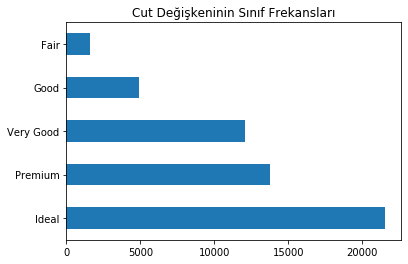

In [10]:
data['cut'].value_counts().plot.barh().set_title('Cut Değişkeninin Sınıf Frekansları');

In [11]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

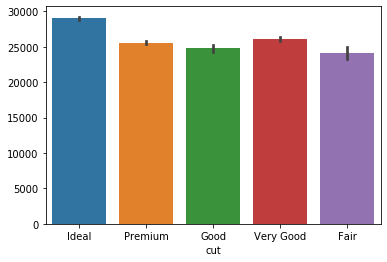

In [12]:
# Cut Değişkeni Sınıfları
import seaborn as sns
sns.barplot(x='cut',y=data.cut.index,data=data);

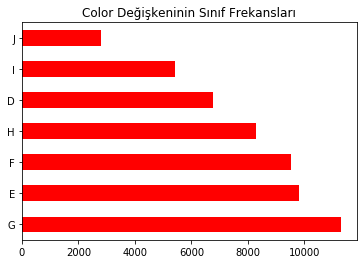

In [13]:
data['color'].value_counts().plot.barh(color='red').set_title('Color Değişkeninin Sınıf Frekansları');

In [14]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

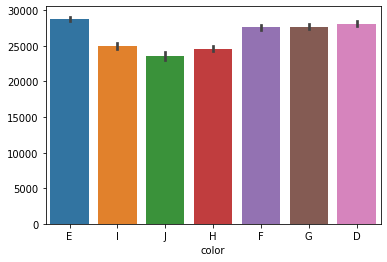

In [15]:
# Color Değişkeni Sınıfları
import seaborn as sns
sns.barplot(x='color',y=data.color.index,data=data);

## Katagorik Veriyi Ordinal Sıralama
Katagorik veriyi ordinal(sıralı) olarak sınıflandırma

In [16]:
from pandas.api.types import CategoricalDtype
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [17]:
data.cut= data.cut.astype(CategoricalDtype(ordered= True))
print(data.cut)
print("\n\n",data.dtypes)# katagorik veri ordinal hale geldi


0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]


 Unnamed: 0       int64
carat          float64
cut           category
color           object
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
dtype: object


* Burada görüldüğü gibi pandas sıralamayı **Fair < Good < Ideal < Premium < Very Good** şeklinde verdi fakat verinin bize verdiği kalite sıralaması **Fair < Good < Very Good  < Premium < Ideal** şeklindedir.

In [18]:
cut_categoric=[ "Fair","Good","Very Good","Premium","Ideal"]


In [19]:
data.cut= data.cut.astype(CategoricalDtype(ordered= True,categories=cut_categoric))
print(data.cut)
print("******************************************\n\n",data.dtypes)# veri orjinal haldeki ordinal hale geldi

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]
******************************************

 Unnamed: 0       int64
carat          float64
cut           category
color           object
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
dtype: object


In [20]:
# COLOR KOLONU İÇİN
color_categoric=['J','I','H','G','F','E','D']
data.color= data.color.astype(CategoricalDtype(ordered= True,categories=color_categoric))
print(data.color)
print("******************************************\n\n",data.dtypes)

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]
******************************************

 Unnamed: 0       int64
carat          float64
cut           category
color         category
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
dtype: object


### Label Encoding ( Ordinal Sıralama Alternatifi)

In [21]:
# cut variable 
catogoricdata=data.iloc[:,2].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Fair", "Good", "Very Good", "Premium", "Ideal"])

cut_transforms=le.transform(catogoricdata)

print("Katogorik veri\n",catogoricdata,"\nİşlenmiş Veri\n",cut_transforms)

Katogorik veri
 [Ideal, Premium, Good, Premium, Good, ..., Ideal, Good, Very Good, Premium, Ideal]
Length: 53940
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal] 
İşlenmiş Veri
 [2 3 1 ... 4 3 2]


In [22]:
# color variable
catogoricdata=data.iloc[:,3].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["D", "E", "F", "G", "H","I","J"])

color_transforms=le.transform(catogoricdata)

print("Katogorik veri\n",catogoricdata,"\nİşlenmiş Veri\n",color_transforms)

Katogorik veri
 [E, E, E, I, J, ..., D, D, D, H, D]
Length: 53940
Categories (7, object): [J < I < H < G < F < E < D] 
İşlenmiş Veri
 [1 1 1 ... 0 4 0]


In [23]:
# Ana dataframe işlenmiş veriyi geçiriyoruz
data['color_transforms']=color_transforms
data['cut_transforms']=cut_transforms

print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  color_transforms  cut_transforms  
0  2.43                 1               2  
1  2.31                 1               3  
2  2.31                 1               1  
3  2.63                 5               3  
4  2.75                 6               1  


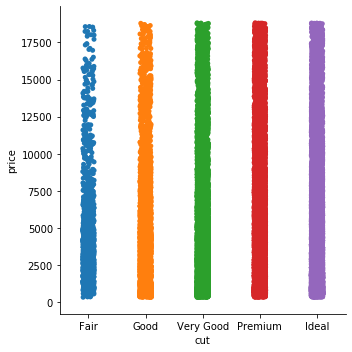

In [24]:
sns.catplot(x='cut',y='price',data=data);

Elmasın kalitesi arttıkça fiyatların arttığı görülmektedir. Örneğin Fair kalitesindeki elmasın 15000$ dan sonra daha az değer aldığı gözükmektedir.

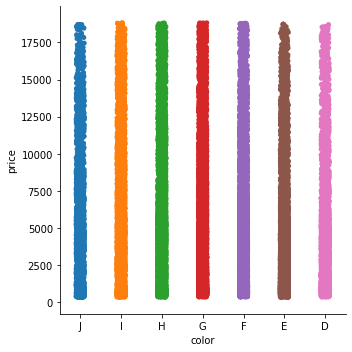

In [25]:
sns.catplot(x='color',y='price',data=data);

* Elmasın G sınıflı rengi hemen her ücrette satıldığı söylenebilir.

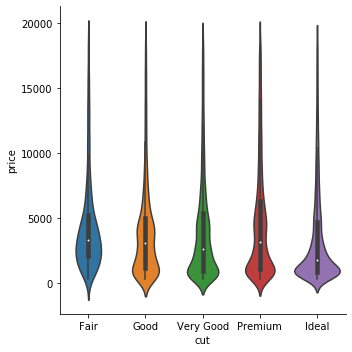

In [26]:
sns.catplot(y='price',x='cut',kind='violin',data=data);

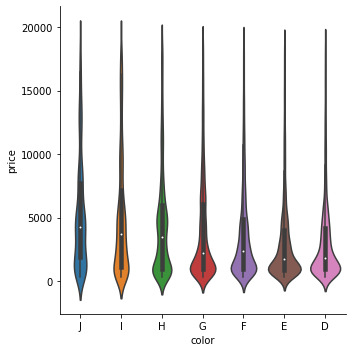

In [27]:
sns.catplot(y='price',x='color',kind='violin',data=data);

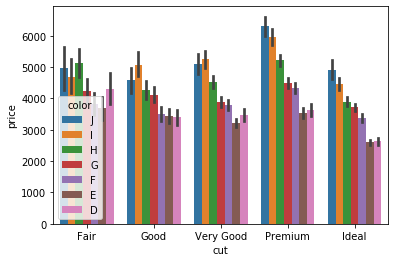

In [28]:
sns.barplot(x='cut',y='price',hue='color',data=data);

* Sutunların üstündeki çubuklar standart sapmalar, Y ekseni cut ve color değişkeninin price değişkeni üzerindeki ortalaması


### Korelasyon Matrisi

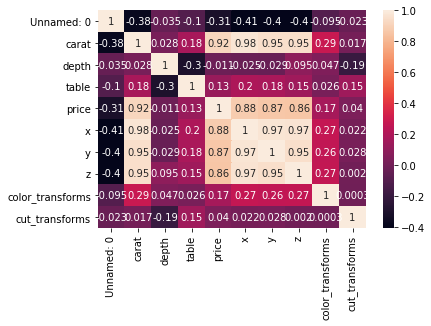

In [29]:
corr=data.corr()

sns.heatmap(corr, annot=True)
plt.show()

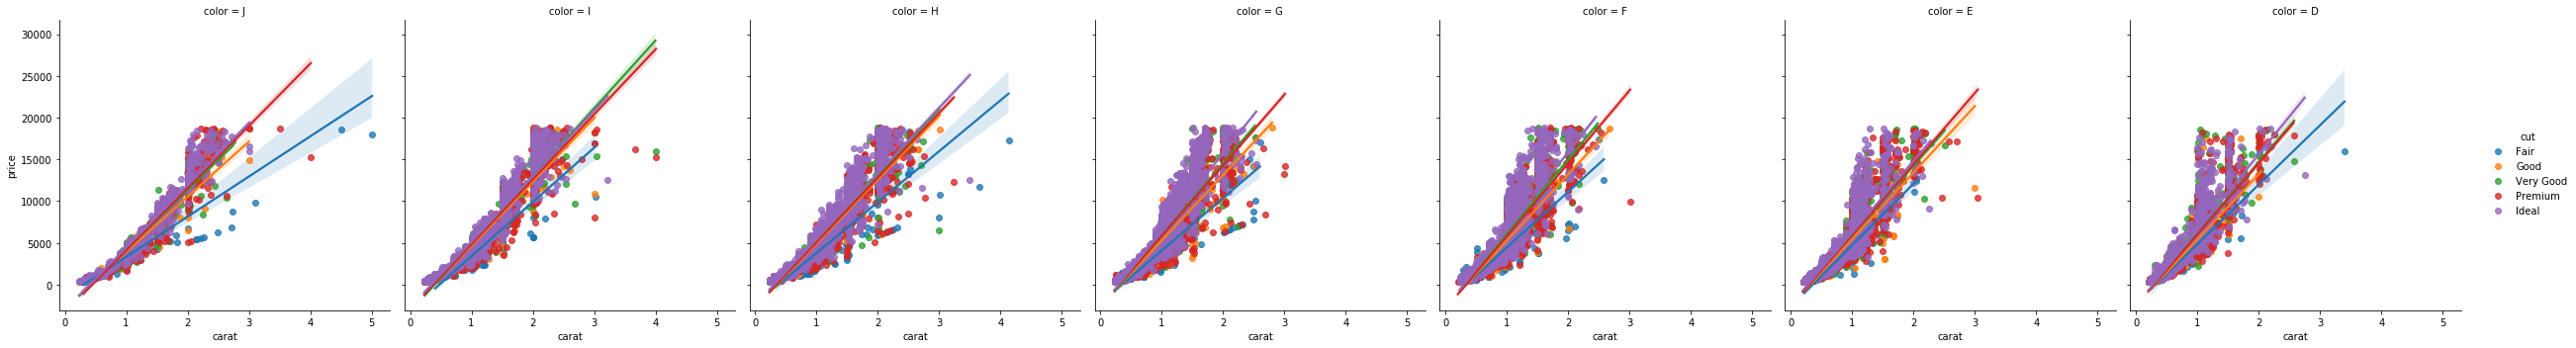

In [30]:
sns.lmplot(x='carat',y='price',hue='cut',col='color',data=data);

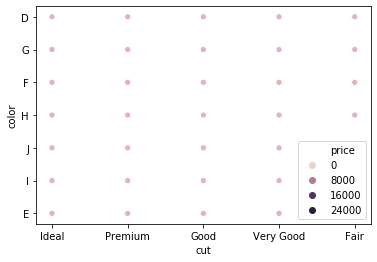

In [31]:
sns.scatterplot(x='cut',y='color',hue='price',data=data);

## Normallik Testi

In [32]:
def Normallik(x,name):
    from scipy import stats    
    print("\n {} Veri Grubu için Kolmogorov-Smirnov Normallik Testi\n".format(name))
    print("H0: Veri normal dağılıma uyar\nH1: Veri normal dağılıma uymaz\n")
    k2, p =  stats.kstest('norm', False, N=53940)
    alpha = 0.05
    print("p = {:g}".format(p))  
    if p < alpha:  # H0 hipotezi: Normal Dağılıma uyar
        print("Ho Red. Veri Normal Dağılıma uymaz ")
    else:
        print("Ho Reddedilemez. Veri Normal Dağılıma uyar")
    print("--------------------\n")  


In [33]:
# Carat İçin Normallik Testi
Normallik(data.carat,'Carat')


 Carat Veri Grubu için Kolmogorov-Smirnov Normallik Testi

H0: Veri normal dağılıma uyar
H1: Veri normal dağılıma uymaz

p = 0.29494
Ho Reddedilemez. Veri Normal Dağılıma uyar
--------------------



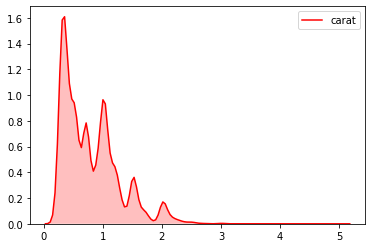

In [34]:
sns.kdeplot(data['carat'], shade=True , color='r');

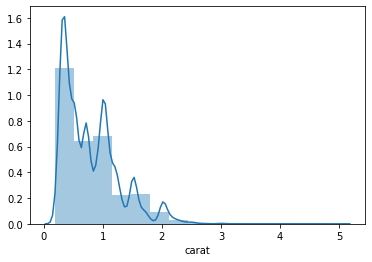

In [35]:
sns.distplot(data.carat,kde=True,bins=15);

Sağa Çarpıktır 

In [36]:
# Price İçin Normallik Testi
Normallik(data.price,'Price')


 Price Veri Grubu için Kolmogorov-Smirnov Normallik Testi

H0: Veri normal dağılıma uyar
H1: Veri normal dağılıma uymaz

p = 0.570658
Ho Reddedilemez. Veri Normal Dağılıma uyar
--------------------



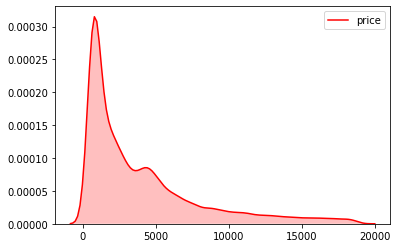

In [37]:
sns.kdeplot(data['price'], shade=True , color='r');

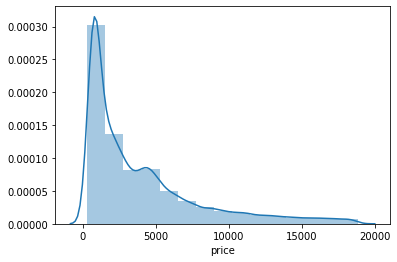

In [38]:
sns.distplot(data.price,kde=True,bins=15);

Standart sapması küçük değildir.Sağa Çarpıktır ve normal dağılıma uymaz

In [39]:
# Depth İçin Normallik Testi
Normallik(data.depth,'Depth')


 Depth Veri Grubu için Kolmogorov-Smirnov Normallik Testi

H0: Veri normal dağılıma uyar
H1: Veri normal dağılıma uymaz

p = 0.520528
Ho Reddedilemez. Veri Normal Dağılıma uyar
--------------------



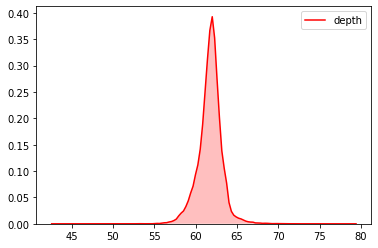

In [40]:
sns.kdeplot(data['depth'], shade=True , color='r');

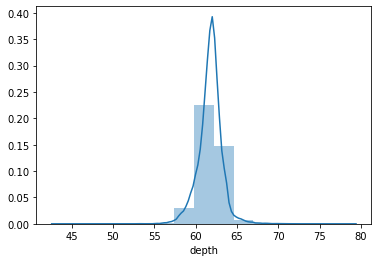

In [41]:
sns.distplot(data.depth,kde=True,bins=15);

Normallik testinden de anlaşılacağı üzere derinlik verisi normal dağılıma uymaktadır.

In [42]:
def Homojenlik(x,y,z,alpha=0.05):
    # VARYANS HOMOJENLİĞİ TESTİ
    print("\n*** VARYANS HOMOJENLİĞİ(LEVENE TESTİ) TESTİ ***\n")
    # H0:VARYANSLAR HOMOJENDİR 
    stat,pvalue_compute=stats.levene(x,y,z)
    print("P values: ",pvalue_compute)
    if(pvalue_compute<alpha):    
        print("Ho Red. VARYANSLAR HOMOJEN DEĞİLDİR")
    else:
        print("Ho Reddedilemez. VARYANSLAR HOMOJENDİR.")
    print("--------------------\n")    
    

In [43]:
Homojenlik(data['carat'],data['price'],data['depth'])


*** VARYANS HOMOJENLİĞİ(LEVENE TESTİ) TESTİ ***

P values:  0.0
Ho Red. VARYANSLAR HOMOJEN DEĞİLDİR
--------------------



### Bağımsız İki Örneklem T-Testi
Varsayımlar:
* Homojen Varyans
* Normal Dağılıma uyum

Hipotezler:

H0: μcarat – μprice = 0

H1: μcarat – μprice ≠ 0

In [44]:
independentSample_result = stats.ttest_ind(data['carat'], data['price'], equal_var=False)
print("P Değeri: %.5f" % independentSample_result[1])


P Değeri: 0.00000


P değeri alfadan(0.05) küçük olduğu için H0 reddedilir.Carat ile Price değişkenlerinin ortalamaları arasında fark vardır.

Zaten Levene testi homojenliğin sağlanmadığı için bunun anlamsız olacağı aşikardır.

### Veri Ölçeklendirme

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(data[['carat','depth','x','y','z','price']]),
                           columns=['carat','depth','x','y','z','price'],
                           index=data.index)

numericals['color_transforms']=color_transforms
numericals['cut_transforms']=cut_transforms
numericals

,carat,depth,x,y,z,price,color_transforms,cut_transforms
0,-1.198168,-0.174092,-1.587837,-1.536196,-1.571129,-0.904095,1,2
1,-1.240361,-1.360738,-1.641325,-1.658774,-1.741175,-0.904095,1,3
2,-1.198168,-3.385019,-1.498691,-1.457395,-1.741175,-0.903844,1,1
3,-1.071587,0.454133,-1.364971,-1.317305,-1.287720,-0.902090,5,3
4,-1.029394,1.082358,-1.240167,-1.212238,-1.117674,-0.901839,6,1
...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,0.016798,0.022304,-0.054888,-0.294731,0,2
53936,-0.164427,0.942753,-0.036690,0.013548,0.100988,-0.294731,0,1
53937,-0.206621,0.733344,-0.063434,-0.047741,0.030135,-0.294731,0,4
53938,0.130927,-0.523105,0.373383,0.337506,0.285204,-0.294731,4,3


### Train - Test Ayrımı

In [46]:
X = numericals.iloc[:,0].values
Y = numericals.price.values
############################
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)
x_train.shape

(36139, 1)

In [47]:
y_train.shape

(36139, 1)

## Modelleme

### Regresyon ile Elmas Değeri Tahminlemesi
##### Lineer Regresyon sklearn

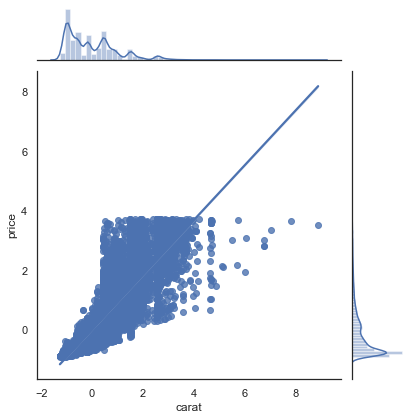

In [48]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='carat',y='price',data=numericals,kind='reg');

Buradaki grafikte price ile carat arasındaki ilişkiyi daha net görebiliyoruz.

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

print("Accuracy: "+ str(regr.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=x_test.shape[0]
p=x_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Accuracy: 85.06865883026266%
Mean absolute error: 0.25129234178400744
Mean squared error: 0.14878714726717024
R Squared: 0.8506865883026267
Adjusted R Squared: 0.8506865883026267


In [50]:
regr.coef_ # Modelin Sabit Katsayısı 

array([[0.92011432]])

In [51]:
regr.intercept_ # Modelin Değişken Katsayısı

array([-0.00079293])

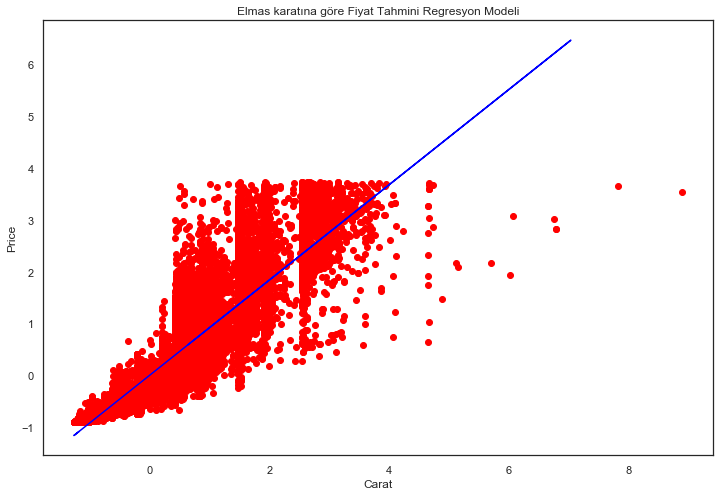

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Elmas karatına göre Fiyat Tahmini Regresyon Modeli')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

#### Lineer Regresyon Statsmodel

In [53]:
import statsmodels.api as sm
lm=sm.OLS(y_train,x_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          2.026e+05
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        03:19:11   Log-Likelihood:                         -17191.
No. Observations:               36139   AIC:                                  3.438e+04
Df Residuals:                   36138   BIC:                                  3.439e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9201      0.002    450.166      0.000       0.916       0.924
==============================================================================
Omnibus:                     9188.139   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107022.119
Skew:                           0.892   Prob(JB):                         0.00
Kurtosis:                      11.240   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Model özetine baktığımızda R^2 değerinin 0.849 geldiği görülmektedir. Bu sonuç modelin başarısını gösterir fakat R^2 parametre değişikliklerinden kolayca etkilenir bunu engellemek amacıyla düzeltilmiş R^2 değerine bakılır. 
* Düzeltilmiş R^2 değeri 0.849 olarak bulunmuş şanlıyız ki değişmedi.

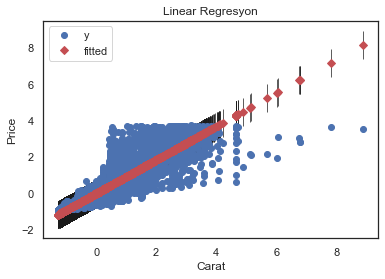

In [54]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 0, ax=ax)
ax.set_ylabel("Price")
ax.set_xlabel("Carat")
ax.set_title("Linear Regresyon")
plt.show()

In [55]:
import statsmodels.api as sm
lm=sm.OLS(Y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          3.041e+05
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        03:19:12   Log-Likelihood:                         -25492.
No. Observations:               53940   AIC:                                  5.099e+04
Df Residuals:                   53939   BIC:                                  5.100e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9216      0.002    551.413      0.000       0.918       0.925
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""